In [4]:
import os
os.chdir('..')

In [5]:
# CELL 1: Import Libraries and Setup
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Create directory structure
directories = [
    'notebooks/monthly',
    'data/monthly',
    'results/monthly',
    'figures/monthly',
    'models/monthly'
]

for directory in directories:
    os.makedirs(directory, exist_ok=True)

print("="*70)
print("MONTHLY TB PREDICTION - DATA PREPROCESSING")
print("="*70)
print("\n✓ Libraries imported successfully!")
print("✓ Directory structure created:")
for directory in directories:
    print(f"   - {directory}/")

MONTHLY TB PREDICTION - DATA PREPROCESSING

✓ Libraries imported successfully!
✓ Directory structure created:
   - notebooks/monthly/
   - data/monthly/
   - results/monthly/
   - figures/monthly/
   - models/monthly/


In [11]:
# CELL 2: Load Raw Climate Data
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 1: LOADING RAW DATA")
print("="*70)

# Load raw data
df = pd.read_csv('data/raw/tb_climate_data.csv')

print(f"-> Raw data loaded successfully!")
print(f"\nDataset Information:")
print(f"  Shape: {df.shape}")
print(f"  Rows: {df.shape[0]:,}")
print(f"  Columns: {df.shape[1]}")

print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print(f"\nFirst few rows:")
print(df.head(3))

print(f"\nData types:")
print(df.dtypes)


STEP 1: LOADING RAW DATA
-> Raw data loaded successfully!

Dataset Information:
  Shape: (112497, 20)
  Rows: 112,497
  Columns: 20

Column names:
   1. District
   2. Date
   3. AQI
   4. CO 
   5. Humidity
   6. NH3
   7. NO2 
   8. O3 
   9. PM10 
  10. PM2.5
  11. Precipitation 
  12. Air Pressure
  13. SO2
  14. Solar Radiation
  15. TB Case
  16. Avg Temp
  17. Temp Max 
  18. Temp Min 
  19. Wind Pressure
  20. Wind Speed

First few rows:
  District      Date  AQI    CO   Humidity  NH3  NO2    O3   PM10   PM2.5  \
0   Achham  1/1/2021 5.00 699.56     31.65 4.48  4.61 41.96 106.54  85.15   
1   Achham  2/1/2021 5.00 634.19     33.12 6.01  4.12 41.47  82.56  62.99   
2   Achham  3/1/2021 4.00 491.50     51.24 2.69  3.15 32.96  42.73  30.27   

   Precipitation   Air Pressure  SO2  Solar Radiation  TB Case  Avg Temp  \
0            0.00         96.96 1.19             3.35     1.00     16.87   
1            0.22         96.89 1.43             3.01      NaN     18.18   
2           

In [12]:
# CELL 3: Standardize Column Names
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 2: STANDARDIZING COLUMN NAMES")
print("="*70)

# Store original column names for reference
original_columns = df.columns.tolist()

# Clean column names: lowercase, remove spaces, remove trailing underscores
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.rstrip('_'))

# Additional specific mappings for consistency
column_mapping = {
    'pm2.5': 'pm25',
    'tb_case': 'tb_case'
}

for old_name, new_name in column_mapping.items():
    if old_name in df.columns:
        df.rename(columns={old_name: new_name}, inplace=True)

print("-> Column names standardized!")
print(f"\nBefore → After:")
for orig, new in zip(original_columns, df.columns):
    if orig != new:
        print(f"  '{orig}' → '{new}'")

print(f"\nStandardized columns ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")




STEP 2: STANDARDIZING COLUMN NAMES
-> Column names standardized!

Before → After:
  'District' → 'district'
  'Date' → 'date'
  'AQI' → 'aqi'
  'CO ' → 'co'
  'Humidity' → 'humidity'
  'NH3' → 'nh3'
  'NO2 ' → 'no2'
  'O3 ' → 'o3'
  'PM10 ' → 'pm10'
  'PM2.5' → 'pm25'
  'Precipitation ' → 'precipitation'
  'Air Pressure' → 'air_pressure'
  'SO2' → 'so2'
  'Solar Radiation' → 'solar_radiation'
  'TB Case' → 'tb_case'
  'Avg Temp' → 'avg_temp'
  'Temp Max ' → 'temp_max'
  'Temp Min ' → 'temp_min'
  'Wind Pressure' → 'wind_pressure'
  'Wind Speed' → 'wind_speed'

Standardized columns (20):
   1. district
   2. date
   3. aqi
   4. co
   5. humidity
   6. nh3
   7. no2
   8. o3
   9. pm10
  10. pm25
  11. precipitation
  12. air_pressure
  13. so2
  14. solar_radiation
  15. tb_case
  16. avg_temp
  17. temp_max
  18. temp_min
  19. wind_pressure
  20. wind_speed


In [13]:
# CELL 4: Convert Date Column to Datetime
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 3: CONVERTING DATE COLUMN")
print("="*70)

# Check current date format
print(f"-> Current date column:")
print(f"   Data type: {df['date'].dtype}")
print(f"   Sample values: {df['date'].head(3).tolist()}")

# Convert to datetime (try dayfirst=True for DD/MM/YYYY format)
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Check for any failed conversions
failed_dates = df['date'].isna().sum()
if failed_dates > 0:
    print(f"\n⚠ Warning: {failed_dates} dates could not be converted")
    print("   These rows will be removed")
    df = df.dropna(subset=['date'])
else:
    print("\n✓ All dates converted successfully!")

print(f"\nDate information:")
print(f"  Data type: {df['date'].dtype}")
print(f"  Date range: {df['date'].min()} to {df['date'].max()}")
print(f"  Total days: {(df['date'].max() - df['date'].min()).days}")
print(f"  Total months: {len(df['date'].dt.to_period('M').unique())}")



STEP 3: CONVERTING DATE COLUMN
-> Current date column:
   Data type: object
   Sample values: ['1/1/2021', '2/1/2021', '3/1/2021']

✓ All dates converted successfully!

Date information:
  Data type: datetime64[ns]
  Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00
  Total days: 1460
  Total months: 48


In [14]:
# CELL 5: Handle TB Case Column (Convert Empty to 0)
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 4: CLEANING TB CASE DATA")
print("="*70)

print("-> Analyzing TB case column...")
print(f"   Data type: {df['tb_case'].dtype}")
print(f"   Unique values sample: {df['tb_case'].unique()[:10]}")

# Count missing/empty values before cleaning
missing_before = df['tb_case'].isna().sum()
print(f"\n   Missing values: {missing_before:,} ({missing_before/len(df)*100:.2f}%)")

# Convert to numeric (empty strings become NaN)
df['tb_case'] = pd.to_numeric(df['tb_case'], errors='coerce')

# Fill NaN with 0 (empty = no TB cases)
df['tb_case'] = df['tb_case'].fillna(0)

# Convert to integer
df['tb_case'] = df['tb_case'].astype(int)

print(f"\n✓ TB case column cleaned!")
print(f"   Data type: {df['tb_case'].dtype}")
print(f"   Total TB cases: {df['tb_case'].sum():,}")
print(f"   Days with TB > 0: {(df['tb_case'] > 0).sum():,} ({(df['tb_case'] > 0).mean()*100:.2f}%)")
print(f"   Days with TB = 0: {(df['tb_case'] == 0).sum():,} ({(df['tb_case'] == 0).mean()*100:.2f}%)")
print(f"   Max cases/day: {df['tb_case'].max()}")
print(f"   Mean cases/day: {df['tb_case'].mean():.2f}")



STEP 4: CLEANING TB CASE DATA
-> Analyzing TB case column...
   Data type: float64
   Unique values sample: [ 1. nan  2.  3.  6.  4.  5.  9. 10.  7.]

   Missing values: 61,964 (55.08%)

✓ TB case column cleaned!
   Data type: int64
   Total TB cases: 137,479
   Days with TB > 0: 50,533 (44.92%)
   Days with TB = 0: 61,964 (55.08%)
   Max cases/day: 66
   Mean cases/day: 1.22


In [15]:
# CELL 6: Verify All Expected Columns Present
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 5: VERIFYING COLUMN STRUCTURE")
print("="*70)

# Expected columns after standardization
expected_columns = [
    'district', 'date', 'aqi', 'co', 'humidity', 'nh3', 'no2', 'o3', 
    'pm10', 'pm25', 'precipitation', 'air_pressure', 'so2', 
    'solar_radiation', 'tb_case', 'avg_temp', 'temp_max', 
    'temp_min', 'wind_pressure', 'wind_speed'
]

print(f"-> Checking for expected columns...")
print(f"   Expected: {len(expected_columns)} columns")
print(f"   Found: {len(df.columns)} columns")

# Check which columns are present
present = [col for col in expected_columns if col in df.columns]
missing = [col for col in expected_columns if col not in df.columns]
extra = [col for col in df.columns if col not in expected_columns]

if missing:
    print(f"\n⚠ Missing columns: {missing}")
if extra:
    print(f"\n⚠ Extra columns: {extra}")

if not missing and not extra:
    print("\n✓ All expected columns present!")
    print("\nColumn structure verified:")
    for i, col in enumerate(expected_columns, 1):
        print(f"  {i:2d}. {col}")
else:
    print("\nCurrent columns:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")



STEP 5: VERIFYING COLUMN STRUCTURE
-> Checking for expected columns...
   Expected: 20 columns
   Found: 20 columns

✓ All expected columns present!

Column structure verified:
   1. district
   2. date
   3. aqi
   4. co
   5. humidity
   6. nh3
   7. no2
   8. o3
   9. pm10
  10. pm25
  11. precipitation
  12. air_pressure
  13. so2
  14. solar_radiation
  15. tb_case
  16. avg_temp
  17. temp_max
  18. temp_min
  19. wind_pressure
  20. wind_speed


In [16]:
# CELL 7: Remove Unwanted Features
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 6: REMOVING UNWANTED FEATURES")
print("="*70)

# Features to remove (as per your specification)
features_to_remove = [
    'aqi',            # Composite of other pollutants
    'wind_pressure',  # Not needed
    'wind_speed',     # Not needed
    'temp_min',       # Keep only avg_temp
    'temp_max',       # Keep only avg_temp
    'pm25'            # Using pm10 instead
]

print(f"-> Removing {len(features_to_remove)} features:")
for i, feature in enumerate(features_to_remove, 1):
    if feature in df.columns:
        print(f"   {i}. {feature} ✓")
    else:
        print(f"   {i}. {feature} ✗ (not found)")

# Remove the features
features_present = [f for f in features_to_remove if f in df.columns]
df_reduced = df.drop(columns=features_present)

print(f"\n✓ Features removed successfully!")
print(f"\nDataset reduction:")
print(f"  Before: {df.shape[1]} columns")
print(f"  After:  {df_reduced.shape[1]} columns")
print(f"  Removed: {len(features_present)} columns")

print(f"\nRemaining columns ({df_reduced.shape[1]}):")
for i, col in enumerate(df_reduced.columns, 1):
    print(f"  {i:2d}. {col}")



STEP 6: REMOVING UNWANTED FEATURES
-> Removing 6 features:
   1. aqi ✓
   2. wind_pressure ✓
   3. wind_speed ✓
   4. temp_min ✓
   5. temp_max ✓
   6. pm25 ✓

✓ Features removed successfully!

Dataset reduction:
  Before: 20 columns
  After:  14 columns
  Removed: 6 columns

Remaining columns (14):
   1. district
   2. date
   3. co
   4. humidity
   5. nh3
   6. no2
   7. o3
   8. pm10
   9. precipitation
  10. air_pressure
  11. so2
  12. solar_radiation
  13. tb_case
  14. avg_temp


In [17]:
# CELL 8: Final Data Cleaning Before Aggregation
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 7: FINAL DATA CLEANING")
print("="*70)

# Check for missing values in key columns
print("-> Checking for missing values...")
missing_counts = df_reduced.isnull().sum()
missing_features = missing_counts[missing_counts > 0]

if len(missing_features) > 0:
    print(f"\n   Features with missing values:")
    for feature, count in missing_features.items():
        percentage = (count / len(df_reduced)) * 100
        print(f"     {feature}: {count:,} ({percentage:.2f}%)")
    
    # Remove rows with missing values in environmental features
    # (Keep district and date, they should be complete)
    env_features = [col for col in df_reduced.columns 
                   if col not in ['district', 'date']]
    
    rows_before = len(df_reduced)
    df_reduced = df_reduced.dropna(subset=env_features)
    rows_after = len(df_reduced)
    rows_dropped = rows_before - rows_after
    
    print(f"\n   Rows with missing values removed:")
    print(f"     Dropped: {rows_dropped:,} ({rows_dropped/rows_before*100:.2f}%)")
    print(f"     Remaining: {rows_after:,}")
else:
    print("   ✓ No missing values found!")

# Check for duplicates
print("\n-> Checking for duplicates...")
duplicates = df_reduced.duplicated(subset=['district', 'date']).sum()
if duplicates > 0:
    print(f"   Found {duplicates} duplicate district-date combinations")
    print(f"   Removing duplicates...")
    df_reduced = df_reduced.drop_duplicates(subset=['district', 'date'])
    print(f"   ✓ Duplicates removed")
else:
    print("   ✓ No duplicates found")

# Sort by district and date
df_reduced = df_reduced.sort_values(['district', 'date']).reset_index(drop=True)
print("\n✓ Data sorted by district and date")

print(f"\nFinal daily dataset:")
print(f"  Shape: {df_reduced.shape}")
print(f"  Rows: {df_reduced.shape[0]:,}")
print(f"  Columns: {df_reduced.shape[1]}")
print(f"  Date range: {df_reduced['date'].min()} to {df_reduced['date'].max()}")
print(f"  Districts: {df_reduced['district'].nunique()}")



STEP 7: FINAL DATA CLEANING
-> Checking for missing values...

   Features with missing values:
     co: 308 (0.27%)
     nh3: 308 (0.27%)
     no2: 308 (0.27%)
     o3: 308 (0.27%)
     pm10: 308 (0.27%)
     so2: 308 (0.27%)

   Rows with missing values removed:
     Dropped: 308 (0.27%)
     Remaining: 112,189

-> Checking for duplicates...
   ✓ No duplicates found

✓ Data sorted by district and date

Final daily dataset:
  Shape: (112189, 14)
  Rows: 112,189
  Columns: 14
  Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00
  Districts: 77


In [22]:
# CELL 8: Final Data Cleaning Before Aggregation
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 8: FINAL DATA CLEANING")
print("="*70)

# Check for missing values in key columns
print("-> Checking for missing values...")
missing_counts = df_reduced.isnull().sum()
missing_features = missing_counts[missing_counts > 0]

if len(missing_features) > 0:
    print(f"\n   Features with missing values:")
    for feature, count in missing_features.items():
        percentage = (count / len(df_reduced)) * 100
        print(f"     {feature}: {count:,} ({percentage:.2f}%)")
    
    # Remove rows with missing values in environmental features
    # (Keep district and date, they should be complete)
    env_features = [col for col in df_reduced.columns 
                   if col not in ['district', 'date']]
    
    rows_before = len(df_reduced)
    df_reduced = df_reduced.dropna(subset=env_features)
    rows_after = len(df_reduced)
    rows_dropped = rows_before - rows_after
    
    print(f"\n   Rows with missing values removed:")
    print(f"     Dropped: {rows_dropped:,} ({rows_dropped/rows_before*100:.2f}%)")
    print(f"     Remaining: {rows_after:,}")
else:
    print("   ✓ No missing values found!")

# Check for duplicates
print("\n-> Checking for duplicates...")
duplicates = df_reduced.duplicated(subset=['district', 'date']).sum()
if duplicates > 0:
    print(f"   Found {duplicates} duplicate district-date combinations")
    print(f"   Removing duplicates...")
    df_reduced = df_reduced.drop_duplicates(subset=['district', 'date'])
    print(f"   ✓ Duplicates removed")
else:
    print("   ✓ No duplicates found")

# Sort by district and date
df_reduced = df_reduced.sort_values(['district', 'date']).reset_index(drop=True)
print("\n✓ Data sorted by district and date")

print(f"\nFinal daily dataset:")
print(f"  Shape: {df_reduced.shape}")
print(f"  Rows: {df_reduced.shape[0]:,}")
print(f"  Columns: {df_reduced.shape[1]}")
print(f"  Date range: {df_reduced['date'].min()} to {df_reduced['date'].max()}")
print(f"  Districts: {df_reduced['district'].nunique()}")


STEP 8: FINAL DATA CLEANING
-> Checking for missing values...
   ✓ No missing values found!

-> Checking for duplicates...
   ✓ No duplicates found

✓ Data sorted by district and date

Final daily dataset:
  Shape: (112189, 14)
  Rows: 112,189
  Columns: 14
  Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00
  Districts: 77


In [ ]:
# CELL 9: Handle Negative Values (Data Quality Issue)
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 9: FIXING NEGATIVE VALUES")
print("="*70)

# Environmental features that should never be negative
positive_only_features = ['co', 'nh3', 'no2', 'o3', 'pm10', 'so2', 
                         'humidity', 'precipitation', 'solar_radiation']

print("-> Checking for negative values in environmental features...")

negative_report = []
for feature in positive_only_features:
    if feature in df_reduced.columns:
        negative_count = (df_reduced[feature] < 0).sum()
        if negative_count > 0:
            negative_pct = (negative_count / len(df_reduced)) * 100
            min_value = df_reduced[feature].min()
            median_value = df_reduced[feature].median()
            
            negative_report.append({
                'Feature': feature,
                'Negative_Count': negative_count,
                'Percentage': f"{negative_pct:.2f}%",
                'Min_Value': f"{min_value:.2f}",
                'Median': f"{median_value:.2f}"
            })
            
            print(f"\n   {feature}:")
            print(f"     Negative values: {negative_count:,} ({negative_pct:.2f}%)")
            print(f"     Min value: {min_value:.2f}")
            print(f"     Median value: {median_value:.2f}")

if negative_report:
    print(f"\n⚠ Found negative values in {len(negative_report)} features")
    print("\nSummary:")
    negative_df = pd.DataFrame(negative_report)
    print(negative_df.to_string(index=False))
    
    # Replace negative values with median
    print("\n-> Replacing negative values with median for each feature...")
    
    for feature in positive_only_features:
        if feature in df_reduced.columns:
            negative_mask = df_reduced[feature] < 0
            if negative_mask.any():
                median_val = df_reduced.loc[df_reduced[feature] >= 0, feature].median()
                count_replaced = negative_mask.sum()
                df_reduced.loc[negative_mask, feature] = median_val
                print(f"   {feature}: {count_replaced:,} values → {median_val:.2f}")
    
    print("\n✓ All negative values replaced with median!")
else:
    print("   ✓ No negative values found!")

# Verify fix
print("\n-> Verification after fix:")
for feature in positive_only_features:
    if feature in df_reduced.columns:
        min_val = df_reduced[feature].min()
        print(f"   {feature}: min = {min_val:.2f} {'✓' if min_val >= 0 else '✗'}")

# Updated summary statistics
print("\nUpdated Environmental Features Summary:")
env_cols = [col for col in df_reduced.columns 
           if col not in ['district', 'date', 'tb_case']]
summary = df_reduced[env_cols].describe().T[['mean', 'std', 'min', 'max']]
print(summary)

# Save cleaned daily data (updated)
daily_output_path = 'data/monthly/tb_daily_cleaned.csv'
df_reduced.to_csv(daily_output_path, index=False)
print(f"\n✓ Updated cleaned daily data saved to '{daily_output_path}'")

print("\n" + "="*70)
print("DATA QUALITY FIXES COMPLETE!")
print("="*70)
print("\nData is now ready for monthly aggregation")
print("All environmental features have valid positive values")


STEP 9: FIXING NEGATIVE VALUES
-> Checking for negative values in environmental features...

   no2:
     Negative values: 154 (0.14%)
     Min value: -416.58
     Median value: 2.95

   o3:
     Negative values: 77 (0.07%)
     Min value: -403.94
     Median value: 56.47

   pm10:
     Negative values: 77 (0.07%)
     Min value: -415.31
     Median value: 37.49

⚠ Found negative values in 3 features

Summary:
Feature  Negative_Count Percentage Min_Value Median
    no2             154      0.14%   -416.58   2.95
     o3              77      0.07%   -403.94  56.47
   pm10              77      0.07%   -415.31  37.49

-> Replacing negative values with median for each feature...
   no2: 154 values → 2.96
   o3: 77 values → 56.49
   pm10: 77 values → 37.53

✓ All negative values replaced with median!

-> Verification after fix:
   co: min = 96.94 ✓
   nh3: min = 0.02 ✓
   no2: min = 0.01 ✓
   o3: min = 0.01 ✓
   pm10: min = 0.55 ✓
   so2: min = 0.00 ✓
   humidity: min = 6.53 ✓
   precipita

In [23]:
# CELL 10: Summary Statistics Before Aggregation
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 10: DAILY DATA SUMMARY")
print("="*70)

print("\nDistricts:")
print(f"  Count: {df_reduced['district'].nunique()}")
print(f"  Names: {sorted(df_reduced['district'].unique())}")

print("\nTB Case Statistics (Daily):")
print(f"  Total cases: {df_reduced['tb_case'].sum():,}")
print(f"  Days with cases: {(df_reduced['tb_case'] > 0).sum():,}")
print(f"  Days without cases: {(df_reduced['tb_case'] == 0).sum():,}")
print(f"  Mean cases/day: {df_reduced['tb_case'].mean():.2f}")
print(f"  Max cases/day: {df_reduced['tb_case'].max()}")

print("\nEnvironmental Features Summary:")
env_cols = [col for col in df_reduced.columns 
           if col not in ['district', 'date', 'tb_case']]
summary = df_reduced[env_cols].describe().T[['mean', 'std', 'min', 'max']]
print(summary)

# Save cleaned daily data for reference
daily_output_path = 'data/monthly/tb_daily_cleaned.csv'
df_reduced.to_csv(daily_output_path, index=False)
print(f"\n✓ Cleaned daily data saved to '{daily_output_path}'")

print("\n" + "="*70)
print("DAILY DATA PREPROCESSING COMPLETE!")
print("="*70)
print(f"\nReady for monthly aggregation:")
print(f"  Daily observations: {len(df_reduced):,}")
print(f"  Expected monthly observations: ~{len(df_reduced['date'].dt.to_period('M').unique())}")
print(f"  Features: {df_reduced.shape[1]}")
print("\nNext: Aggregate daily data to monthly")



STEP 10: DAILY DATA SUMMARY

Districts:
  Count: 77
  Names: ['Achham', 'Arghakhanchi', 'Baglung', 'Baitadi', 'Bajhang', 'Bajura', 'Banke', 'Bara', 'Bardiya', 'Bhaktapur', 'Bhojpur', 'Chitwan', 'Dadeldhura', 'Dailekh', 'Dang', 'Darchula', 'Dhading', 'Dhankuta', 'Dhanusa', 'Dolakha', 'Dolpa', 'Doti', 'Gorkha', 'Gulmi', 'Humla', 'Ilam', 'Jajarkot', 'Jhapa', 'Jumla', 'Kailali', 'Kalikot', 'Kanchanpur', 'Kapilvastu', 'Kaski', 'Kathmandu', 'Kavrepalanchok', 'Khotang', 'Lalitpur', 'Lamjung', 'Mahottari', 'Makwanpur', 'Manang', 'Morang', 'Mugu', 'Mustang', 'Myagdi', 'Nawalparasi East', 'Nawalparasi West', 'Nuwakot', 'Okhaldhunga', 'Palpa', 'Panchthar', 'Parbat', 'Parsa', 'Pyuthan', 'Ramechhap', 'Rasuwa', 'Rautahat', 'Rolpa', 'Rukum East', 'Rukum West', 'Rupandehi', 'Salyan', 'Sankhuwasabha', 'Saptari', 'Sarlahi', 'Sindhuli', 'Sindhupalchok', 'Siraha', 'Solukhumbu', 'Sunsari', 'Surkhet', 'Syangja', 'Tanahun', 'Taplejung', 'Terhathum', 'Udayapur']

TB Case Statistics (Daily):
  Total cases: 13

In [24]:
# CELL 11: Prepare for Monthly Aggregation
# ------------------------------------------------------------
print("\n" + "="*70)
print("MONTHLY AGGREGATION PIPELINE")
print("="*70)

print("\n-> Current daily dataset:")
print(f"   Shape: {df_reduced.shape}")
print(f"   Date range: {df_reduced['date'].min()} to {df_reduced['date'].max()}")
print(f"   Districts: {df_reduced['district'].nunique()}")
print(f"   Total daily observations: {len(df_reduced):,}")

# Create year-month column for aggregation
df_reduced['year'] = df_reduced['date'].dt.year
df_reduced['month'] = df_reduced['date'].dt.month
df_reduced['year_month'] = df_reduced['date'].dt.to_period('M')

print(f"\n✓ Temporal columns created:")
print(f"   Unique year-month periods: {df_reduced['year_month'].nunique()}")
print(f"   Years covered: {sorted(df_reduced['year'].unique())}")
print(f"   Expected monthly observations: ~{df_reduced['district'].nunique() * df_reduced['year_month'].nunique()}")



MONTHLY AGGREGATION PIPELINE

-> Current daily dataset:
   Shape: (112189, 14)
   Date range: 2021-01-01 00:00:00 to 2024-12-31 00:00:00
   Districts: 77
   Total daily observations: 112,189

✓ Temporal columns created:
   Unique year-month periods: 48
   Years covered: [np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]
   Expected monthly observations: ~3696


In [25]:
# CELL 12: Define Aggregation Strategy
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 1: DEFINING AGGREGATION RULES")
print("="*70)

# Define how each feature should be aggregated
aggregation_rules = {
    # TB Cases: SUM (total cases per month)
    'tb_case': 'sum',
    
    # Pollutants: MEAN (average pollution level)
    'co': 'mean',
    'nh3': 'mean',
    'no2': 'mean',
    'o3': 'mean',
    'pm10': 'mean',
    'so2': 'mean',
    
    # Weather: MEAN (average conditions)
    'humidity': 'mean',
    'avg_temp': 'mean',
    'air_pressure': 'mean',
    'solar_radiation': 'mean',
    
    # Precipitation: SUM (total rainfall)
    'precipitation': 'sum'
}

print("-> Aggregation rules defined:")
print("\n   SUM (Cumulative):")
for feature, rule in aggregation_rules.items():
    if rule == 'sum':
        print(f"     • {feature}")

print("\n   MEAN (Average):")
for feature, rule in aggregation_rules.items():
    if rule == 'mean':
        print(f"     • {feature}")

print(f"\n   Total features to aggregate: {len(aggregation_rules)}")



STEP 1: DEFINING AGGREGATION RULES
-> Aggregation rules defined:

   SUM (Cumulative):
     • tb_case
     • precipitation

   MEAN (Average):
     • co
     • nh3
     • no2
     • o3
     • pm10
     • so2
     • humidity
     • avg_temp
     • air_pressure
     • solar_radiation

   Total features to aggregate: 12


In [26]:
# CELL 13: Perform Monthly Aggregation
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 2: AGGREGATING TO MONTHLY DATA")
print("="*70)

print("-> Aggregating daily data to monthly by district...")
print("   This may take a moment...")

# Group by district and year-month, then aggregate
df_monthly = df_reduced.groupby(['district', 'year_month']).agg(aggregation_rules).reset_index()

# Convert year_month back to datetime (first day of month)
df_monthly['date'] = df_monthly['year_month'].dt.to_timestamp()

# Drop the year_month period column (keep datetime)
df_monthly = df_monthly.drop(columns=['year_month'])

# Reorder columns: district, date, then features
column_order = ['district', 'date'] + [col for col in aggregation_rules.keys()]
df_monthly = df_monthly[column_order]

print(f"\n✓ Aggregation complete!")
print(f"\nMonthly dataset:")
print(f"   Shape: {df_monthly.shape}")
print(f"   Rows: {df_monthly.shape[0]:,} (monthly observations)")
print(f"   Columns: {df_monthly.shape[1]}")
print(f"   Districts: {df_monthly['district'].nunique()}")
print(f"   Months: {len(df_monthly['date'].dt.to_period('M').unique())}")

# Calculate compression ratio
compression_ratio = len(df_reduced) / len(df_monthly)
print(f"\n   Compression: {len(df_reduced):,} daily → {len(df_monthly):,} monthly")
print(f"   Ratio: {compression_ratio:.1f}:1 (data reduced by {(1-1/compression_ratio)*100:.1f}%)")



STEP 2: AGGREGATING TO MONTHLY DATA
-> Aggregating daily data to monthly by district...
   This may take a moment...

✓ Aggregation complete!

Monthly dataset:
   Shape: (3696, 14)
   Rows: 3,696 (monthly observations)
   Columns: 14
   Districts: 77
   Months: 48

   Compression: 112,189 daily → 3,696 monthly
   Ratio: 30.4:1 (data reduced by 96.7%)


In [27]:
# CELL 14: Verify Monthly Aggregation Quality
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 3: VERIFYING AGGREGATION QUALITY")
print("="*70)

# Check for missing months
print("-> Checking for data completeness...")

# Expected: all districts should have data for all months
districts = df_monthly['district'].unique()
all_months = df_monthly['date'].dt.to_period('M').unique()

print(f"\n   Districts: {len(districts)}")
print(f"   Months: {len(all_months)}")
print(f"   Expected total: {len(districts) * len(all_months)}")
print(f"   Actual total: {len(df_monthly)}")

if len(df_monthly) < len(districts) * len(all_months):
    missing_pct = (1 - len(df_monthly) / (len(districts) * len(all_months))) * 100
    print(f"   ⚠ Missing {missing_pct:.1f}% of expected district-month combinations")
    print(f"   (Some districts may not have data for all months)")
else:
    print(f"   ✓ Complete data for all district-month combinations!")

# Check for any remaining missing values
print("\n-> Checking for missing values...")
missing_monthly = df_monthly.isnull().sum()
if missing_monthly.sum() > 0:
    print(f"   Features with missing values:")
    for col, count in missing_monthly[missing_monthly > 0].items():
        print(f"     {col}: {count}")
else:
    print(f"   ✓ No missing values in monthly data!")

# Sample of monthly data
print("\n-> Sample of monthly data (first 5 rows):")
print(df_monthly.head())



STEP 3: VERIFYING AGGREGATION QUALITY
-> Checking for data completeness...

   Districts: 77
   Months: 48
   Expected total: 3696
   Actual total: 3696
   ✓ Complete data for all district-month combinations!

-> Checking for missing values...
   ✓ No missing values in monthly data!

-> Sample of monthly data (first 5 rows):
  district       date  tb_case     co   nh3  no2    o3   pm10  so2  humidity  \
0   Achham 2021-01-01       14 718.98  3.40 3.96 43.98 119.35 1.29     39.00   
1   Achham 2021-02-01       14 701.06  6.58 4.58 68.38 144.50 2.85     31.18   
2   Achham 2021-03-01        7 541.07 10.93 4.31 78.42  88.92 3.50     22.25   
3   Achham 2021-04-01       23 496.85  6.75 3.01 84.12  63.80 2.36     20.02   
4   Achham 2021-05-01        7 523.64  2.81 1.87 38.36  45.65 0.81     47.67   

   avg_temp  air_pressure  solar_radiation  precipitation  
0     16.65         96.78             3.10          10.38  
1     20.13         96.75             4.38           1.49  
2     25.67

In [28]:
# CELL 15: Monthly Data Statistics
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 4: MONTHLY DATA SUMMARY STATISTICS")
print("="*70)

print("\nTB Case Statistics (Monthly):")
print(f"  Total TB cases (all months): {df_monthly['tb_case'].sum():,}")
print(f"  Mean cases/month: {df_monthly['tb_case'].mean():.2f}")
print(f"  Median cases/month: {df_monthly['tb_case'].median():.2f}")
print(f"  Std cases/month: {df_monthly['tb_case'].std():.2f}")
print(f"  Min cases/month: {df_monthly['tb_case'].min()}")
print(f"  Max cases/month: {df_monthly['tb_case'].max()}")

# Check if any months have zero cases
zero_months = (df_monthly['tb_case'] == 0).sum()
print(f"\n  Months with 0 cases: {zero_months} ({zero_months/len(df_monthly)*100:.2f}%)")
print(f"  Months with cases: {(df_monthly['tb_case'] > 0).sum()} ({(df_monthly['tb_case'] > 0).mean()*100:.2f}%)")

# TB cases by district
print("\nTB Cases by District (Monthly Average):")
district_tb = df_monthly.groupby('district')['tb_case'].agg(['mean', 'sum', 'count'])
district_tb.columns = ['Avg/Month', 'Total', 'Months']
district_tb = district_tb.sort_values('Total', ascending=False)
print(district_tb)

# Environmental features statistics
print("\nMonthly Environmental Features Summary:")
env_cols = [col for col in df_monthly.columns 
           if col not in ['district', 'date', 'tb_case']]
monthly_summary = df_monthly[env_cols].describe().T[['mean', 'std', 'min', 'max']]
print(monthly_summary)

# Compare daily vs monthly statistics
print("\n" + "-"*70)
print("DAILY vs MONTHLY COMPARISON")
print("-"*70)

comparison_features = ['co', 'pm10', 'humidity', 'avg_temp', 'precipitation']
print("\nKey Features Comparison:")
print(f"{'Feature':<15} {'Daily Mean':<12} {'Monthly Mean':<12} {'Difference'}")
print("-" * 55)

for feature in comparison_features:
    if feature in df_reduced.columns and feature in df_monthly.columns:
        daily_mean = df_reduced[feature].mean()
        monthly_mean = df_monthly[feature].mean()
        
        # For precipitation (sum), compare totals instead
        if feature == 'precipitation':
            daily_total = df_reduced[feature].sum()
            monthly_total = df_monthly[feature].sum()
            diff = monthly_total - daily_total
            print(f"{feature:<15} {daily_total:>11.2f} {monthly_total:>11.2f} {diff:>10.2f}")
        else:
            diff = monthly_mean - daily_mean
            print(f"{feature:<15} {daily_mean:>11.2f} {monthly_mean:>11.2f} {diff:>10.2f}")




STEP 4: MONTHLY DATA SUMMARY STATISTICS

TB Case Statistics (Monthly):
  Total TB cases (all months): 137,099
  Mean cases/month: 37.09
  Median cases/month: 18.00
  Std cases/month: 45.76
  Min cases/month: 0
  Max cases/month: 330

  Months with 0 cases: 143 (3.87%)
  Months with cases: 3553 (96.13%)

TB Cases by District (Monthly Average):
            Avg/Month  Total  Months
district                            
Kathmandu      250.67  12032      48
Rupandehi      138.04   6626      48
Kailali        116.08   5572      48
Sarlahi        114.12   5478      48
Bara           110.58   5308      48
...               ...    ...     ...
Humla            2.42    116      48
Terhathum        1.98     95      48
Rukum East       1.10     53      48
Mustang          0.67     32      48
Manang           0.25     12      48

[77 rows x 3 columns]

Monthly Environmental Features Summary:
                  mean    std    min     max
co              650.03 523.74 121.80 5446.17
nh3               7


STEP 5: VISUALIZING MONTHLY DATA
✓ Visualization saved to 'figures/monthly/monthly_data_overview.png'


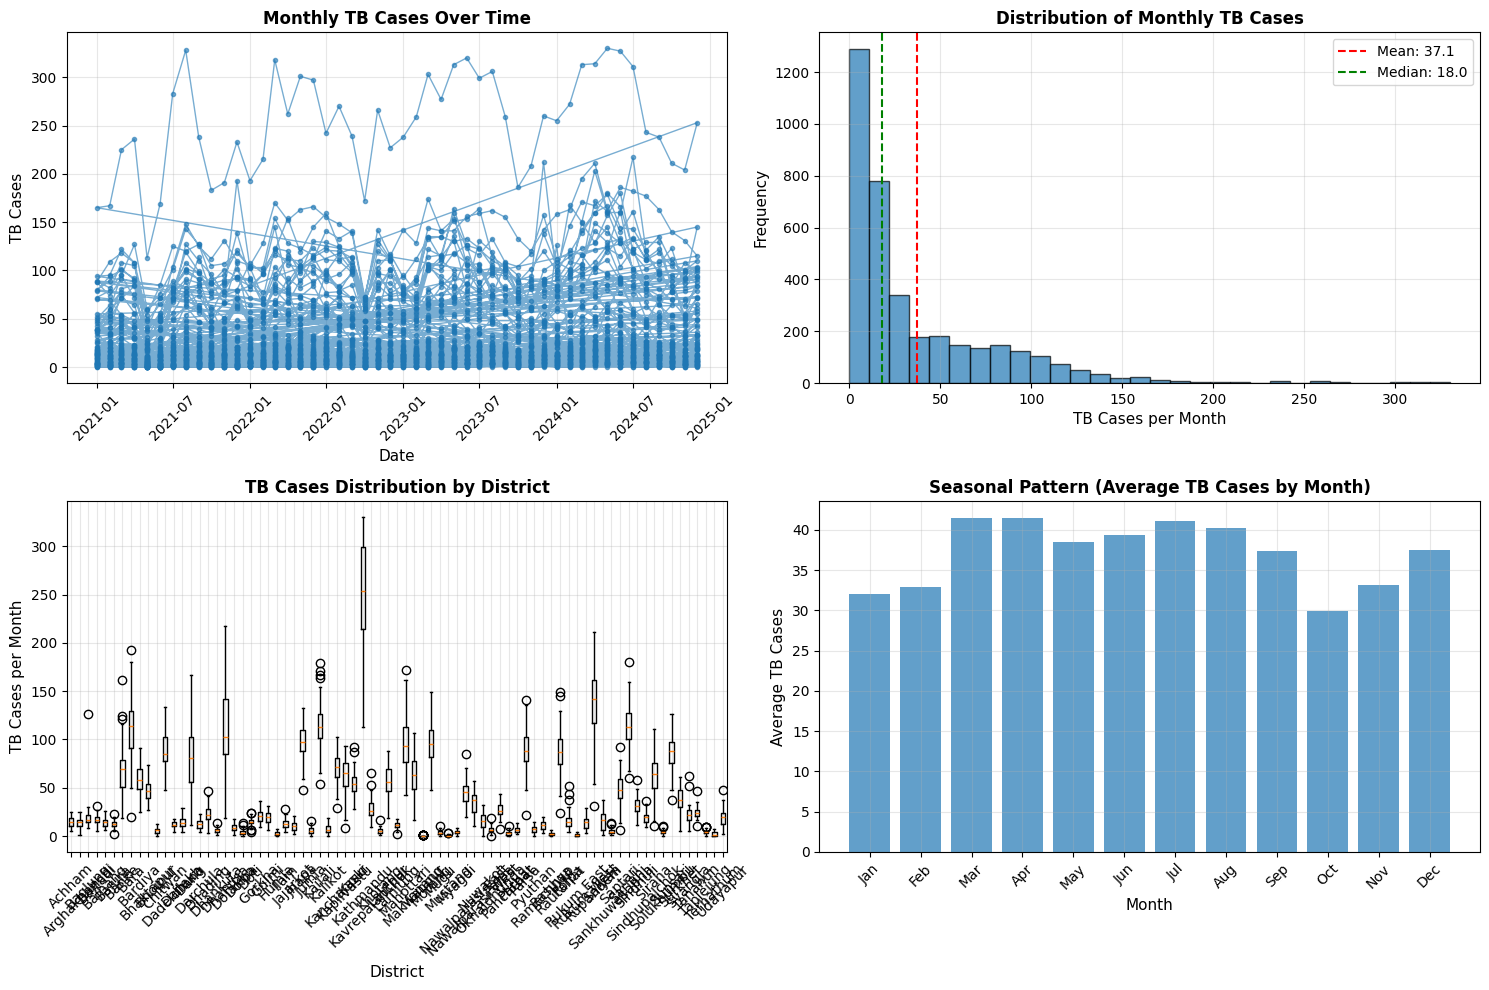

In [29]:
# CELL 16: Visualize Monthly Data
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 5: VISUALIZING MONTHLY DATA")
print("="*70)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Monthly TB cases over time
axes[0, 0].plot(df_monthly['date'], df_monthly['tb_case'], marker='o', 
                linewidth=1, markersize=3, alpha=0.6)
axes[0, 0].set_xlabel('Date', fontsize=11)
axes[0, 0].set_ylabel('TB Cases', fontsize=11)
axes[0, 0].set_title('Monthly TB Cases Over Time', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. TB cases distribution (histogram)
axes[0, 1].hist(df_monthly['tb_case'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df_monthly['tb_case'].mean(), color='red', 
                   linestyle='--', label=f'Mean: {df_monthly["tb_case"].mean():.1f}')
axes[0, 1].axvline(df_monthly['tb_case'].median(), color='green', 
                   linestyle='--', label=f'Median: {df_monthly["tb_case"].median():.1f}')
axes[0, 1].set_xlabel('TB Cases per Month', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Distribution of Monthly TB Cases', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. TB cases by district (box plot)
district_data = [df_monthly[df_monthly['district'] == d]['tb_case'].values 
                for d in sorted(df_monthly['district'].unique())]
axes[1, 0].boxplot(district_data, labels=sorted(df_monthly['district'].unique()))
axes[1, 0].set_xlabel('District', fontsize=11)
axes[1, 0].set_ylabel('TB Cases per Month', fontsize=11)
axes[1, 0].set_title('TB Cases Distribution by District', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3)

# 4. Seasonal pattern (average by month)
df_monthly['month_num'] = df_monthly['date'].dt.month
monthly_pattern = df_monthly.groupby('month_num')['tb_case'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 1].bar(monthly_pattern.index, monthly_pattern.values, alpha=0.7)
axes[1, 1].set_xlabel('Month', fontsize=11)
axes[1, 1].set_ylabel('Average TB Cases', fontsize=11)
axes[1, 1].set_title('Seasonal Pattern (Average TB Cases by Month)', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].set_xticklabels(month_names, rotation=45)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('figures/monthly/monthly_data_overview.png', dpi=300, bbox_inches='tight')
print("✓ Visualization saved to 'figures/monthly/monthly_data_overview.png'")
plt.show()


In [31]:
# CELL 17: Save Monthly Dataset
# ------------------------------------------------------------
print("\n" + "="*70)
print("STEP 6: SAVING MONTHLY DATASET")
print("="*70)

# Remove the temporary month_num column if it exists
if 'month_num' in df_monthly.columns:
    df_monthly = df_monthly.drop(columns=['month_num'])

# Save monthly data
monthly_output_path = 'data/monthly/tb_monthly_processed.csv'
df_monthly.to_csv(monthly_output_path, index=False)

print(f"✓ Monthly dataset saved to '{monthly_output_path}'")
print(f"\nFile details:")
print(f"  Rows: {df_monthly.shape[0]:,}")
print(f"  Columns: {df_monthly.shape[1]}")
print(f"  Size: {df_monthly.memory_usage(deep=True).sum() / 1024:.2f} KB")


STEP 6: SAVING MONTHLY DATASET
✓ Monthly dataset saved to 'data/monthly/tb_monthly_processed.csv'

File details:
  Rows: 3,696
  Columns: 14
  Size: 579.69 KB


In [32]:
# CELL 18: Final Summary
# ------------------------------------------------------------
print("\n" + "="*70)
print("MONTHLY AGGREGATION COMPLETE!")
print("="*70)

print(f"\n📊 TRANSFORMATION SUMMARY:")
print(f"   Daily data:    {len(df_reduced):,} observations")
print(f"   Monthly data:  {len(df_monthly):,} observations")
print(f"   Reduction:     {(1 - len(df_monthly)/len(df_reduced))*100:.1f}%")
print(f"   ")
print(f"   Districts:     {df_monthly['district'].nunique()}")
print(f"   Time span:     {(df_monthly['date'].max() - df_monthly['date'].min()).days} days")
print(f"   Months:        {len(df_monthly['date'].dt.to_period('M').unique())}")
print(f"   Features:      {df_monthly.shape[1]}")

print(f"\n📈 TB CASE IMPROVEMENTS:")
print(f"   Daily avg:     {df_reduced['tb_case'].mean():.2f} cases/day")
print(f"   Monthly avg:   {df_monthly['tb_case'].mean():.2f} cases/month")
print(f"   Monthly median: {df_monthly['tb_case'].median():.2f} cases/month")
print(f"   Months with 0:  {(df_monthly['tb_case'] == 0).sum()} ({(df_monthly['tb_case'] == 0).mean()*100:.1f}%)")

print(f"\n📁 OUTPUT FILES:")
print(f"   1. data/monthly/tb_monthly_processed.csv")
print(f"   2. figures/monthly/monthly_data_overview.png")
print(f"   3. results/monthly/monthly_aggregation_summary.txt")

print(f"\n🎯 READY FOR MODELING!")
print(f"   Expected performance: R² = 0.70-0.85")
print(f"   (vs current daily R² = 0.56)")

print("\n" + "="*70)
print("✅ Monthly dataset ready for model training!")
print("="*70)


MONTHLY AGGREGATION COMPLETE!

📊 TRANSFORMATION SUMMARY:
   Daily data:    112,189 observations
   Monthly data:  3,696 observations
   Reduction:     96.7%
   
   Districts:     77
   Time span:     1430 days
   Months:        48
   Features:      14

📈 TB CASE IMPROVEMENTS:
   Daily avg:     1.22 cases/day
   Monthly avg:   37.09 cases/month
   Monthly median: 18.00 cases/month
   Months with 0:  143 (3.9%)

📁 OUTPUT FILES:
   1. data/monthly/tb_monthly_processed.csv
   2. figures/monthly/monthly_data_overview.png
   3. results/monthly/monthly_aggregation_summary.txt

🎯 READY FOR MODELING!
   Expected performance: R² = 0.70-0.85
   (vs current daily R² = 0.56)

✅ Monthly dataset ready for model training!
